In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns

# Import File

In [2]:
#Importing file
shark_attacks = pd.read_csv(r'C:\Patricia\Backup\Tecnologia\Ironhack\Shark_attacks\attacks.csv', encoding='latin1')

#Modify display options
pd.options.display.max_columns = 99

#View information
shark_attacks.head()


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


# Heatmap before dropping duplicate values

<AxesSubplot:>

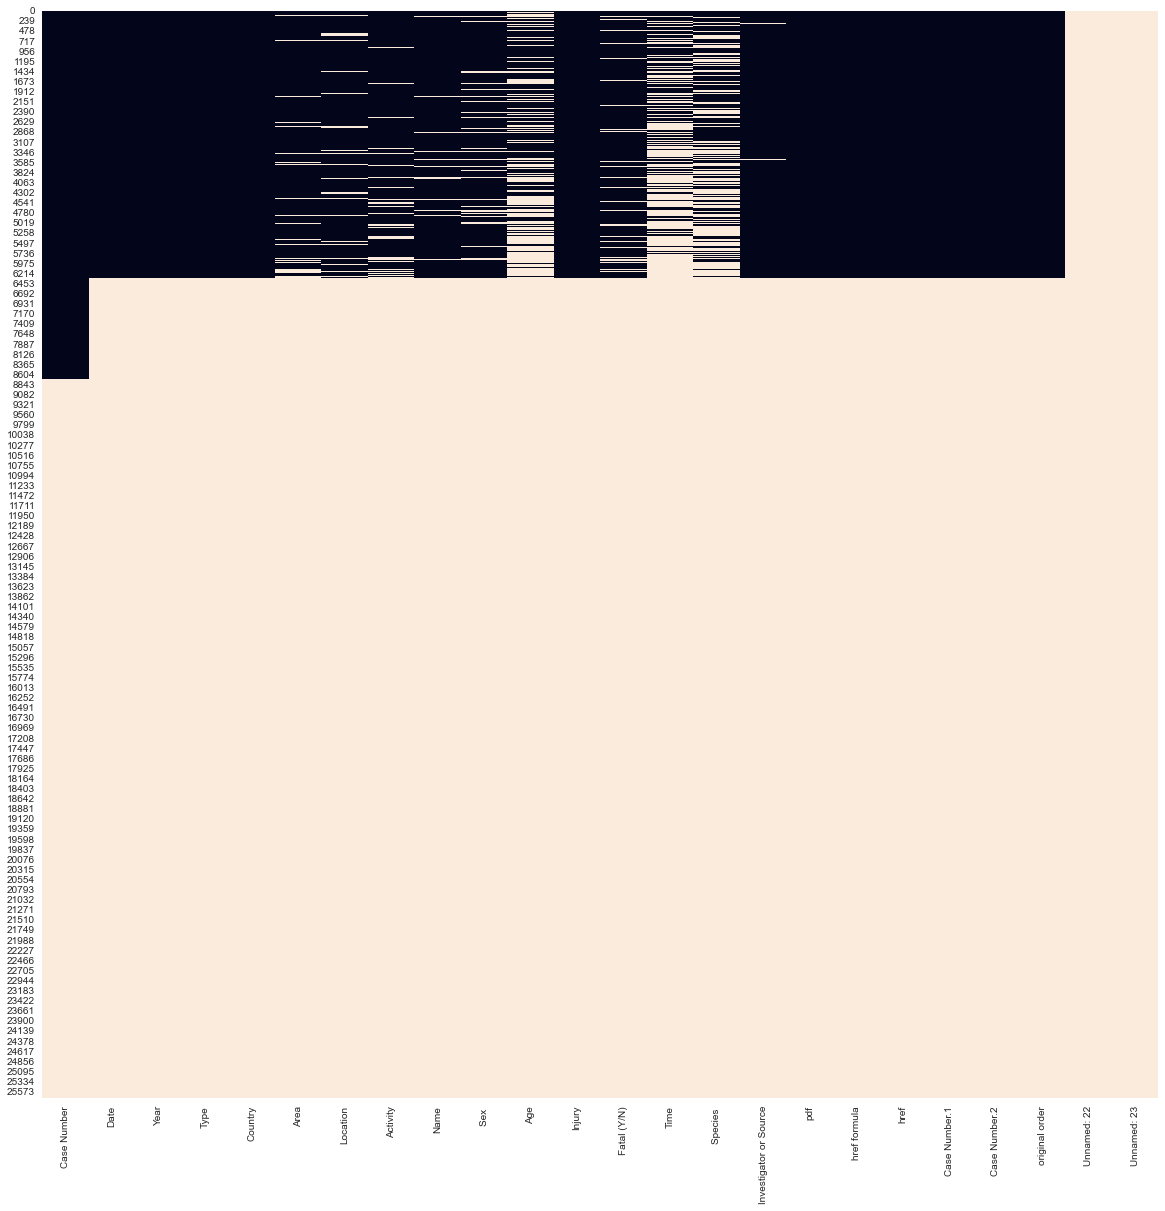

In [3]:
sns.set({'figure.figsize':(20,20)})
sns.heatmap(shark_attacks.isnull(),cbar=False)

In [4]:
#Show columns names
shark_attacks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [5]:
# Rename Species ' column to 'Species' and 'Sex ' to 'Sex'
shark_attacks = shark_attacks.rename(columns = {'Species ':'Species'})
shark_attacks = shark_attacks.rename(columns = {'Sex ':'Sex'})

shark_attacks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [6]:
# Numbers of lines and columns
shark_attacks.shape

(25723, 24)

In [7]:
#Check the number of duplicated rows
shark_attacks.duplicated().sum()

19411

In [8]:
#Show duplicated rows
shark_attacks[shark_attacks.duplicated(keep = False)].sort_values(by = ['Case Number', 'Date'])

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6310,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6311,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6312,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6313,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Drop duplicated rows and reset index
shark_attacks = shark_attacks.drop_duplicates(keep='last', ignore_index=True)
shark_attacks = shark_attacks.reset_index()

In [11]:
# Drop empty columns
shark_attacks = shark_attacks.drop(columns=['Unnamed: 22','Unnamed: 23'])

In [12]:
shark_attacks.shape

(6312, 23)

# Heatmap after dropping duplicate values

<AxesSubplot:>

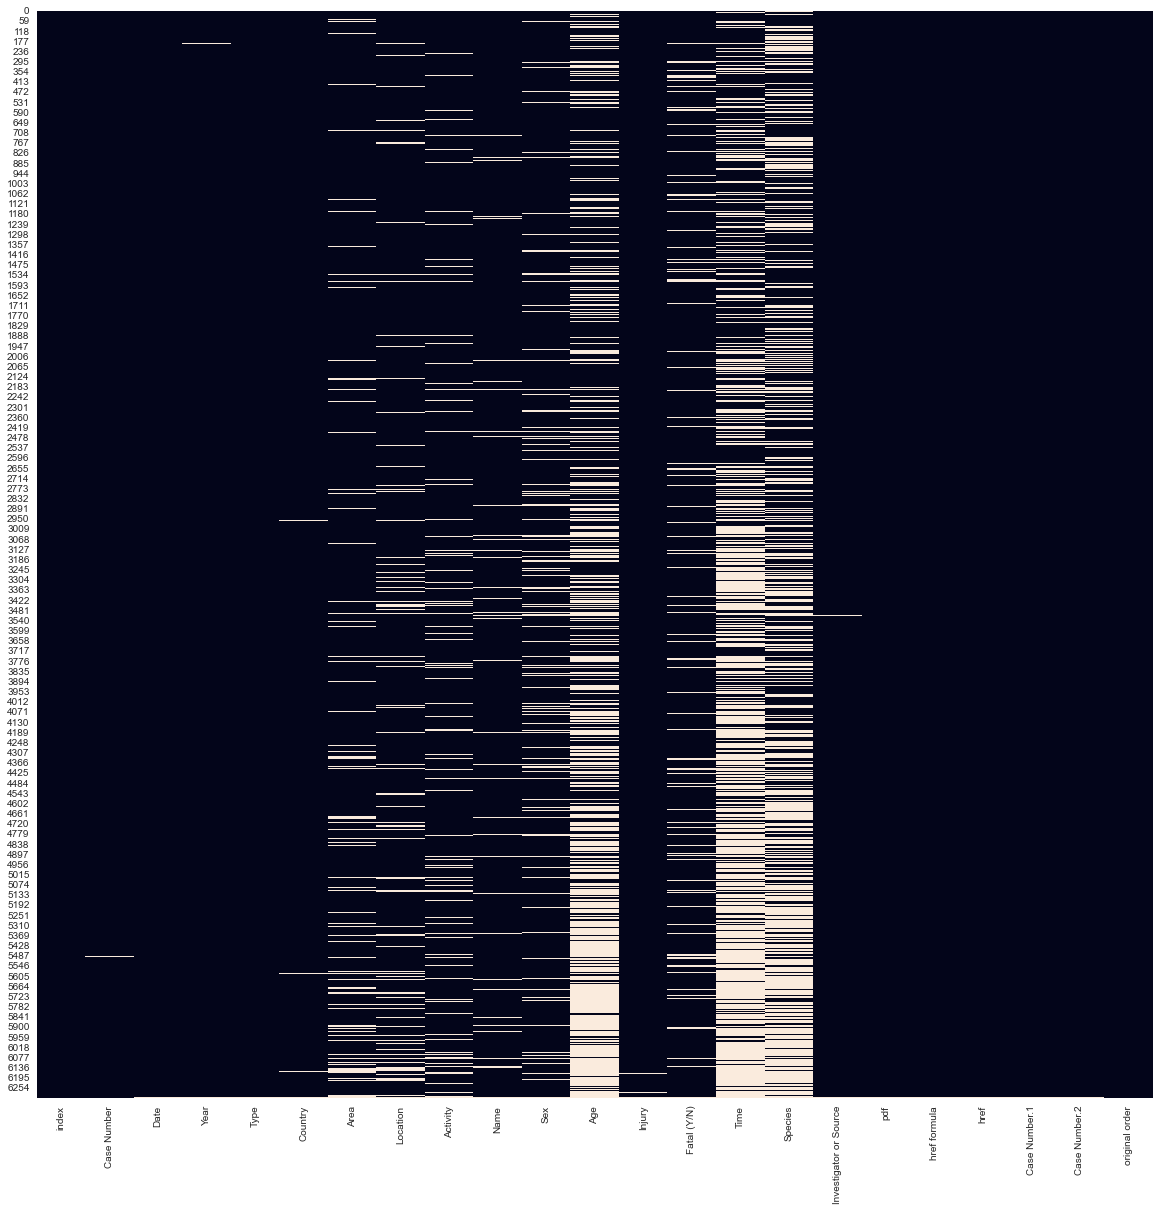

In [13]:
sns.set({'figure.figsize':(20,20)})
sns.heatmap(shark_attacks.isnull(),cbar=False)

In [12]:
shark_attacks.dtypes

index                       int64
Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [14]:
# Pandas Profiling Report
from pandas_profiling import ProfileReport

In [16]:
profile = ProfileReport(shark_attacks)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# ******ARE MORE FATAL ATTACKS ? *******

# ***** NO

In [17]:
# What values are in the column 'Fatal (Y/N)'?
shark_attacks.groupby('Fatal (Y/N)').count()

,df_index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
Fatal (Y/N),,,,,,,,,,,,,,,,,,,,,,
N,7,7,7,7,7,7,7,7,5,6,7,6,7,3,5,7,7,7,7,7,7,7
2017,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
M,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
N,4293,4292,4293,4293,4292,4274,4087,4018,4018,4227,3945,2606,4293,2293,2497,4282,4293,4293,4293,4293,4293,4293
N,1,1,1,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1
UNKNOWN,71,71,71,71,71,69,64,60,36,63,40,10,51,7,17,70,71,71,71,71,71,71
Y,1388,1388,1388,1387,1386,1364,1198,1191,1282,1310,1281,620,1387,497,427,1388,1388,1387,1388,1388,1388,1388
y,1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1


In [18]:
#Identify line with '2017' value at column 'Fatal (Y/N)'
mask_fatal_2017 = shark_attacks['Fatal (Y/N)'] == '2017'
shark_attacks[mask_fatal_2017]

,df_index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
786,786,2012.06.10,10-Jun-2012,2012.0,Provoked,ITALY,Sardinia,Muravera,Attempting to rescue an injured & beached shark,Giorgio Zara,M,57,Lower left leg injured PROVOKED ACCIDENT,2017,Morning,"Blue shark, 2.5m","D. Puddo, 6/11/2012",2012.06.10-Zara.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.06.10,2012.06.10,5517.0


In [19]:
# Just a injured leg, probably not fatal. 
shark_attacks.loc[mask_fatal_2017,'Fatal (Y/N)'] = 'N'
shark_attacks.groupby('Fatal (Y/N)').count()

,df_index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
Fatal (Y/N),,,,,,,,,,,,,,,,,,,,,,
N,7,7,7,7,7,7,7,7,5,6,7,6,7,3,5,7,7,7,7,7,7,7
M,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
N,4294,4293,4294,4294,4293,4275,4088,4019,4019,4228,3946,2607,4294,2294,2498,4283,4294,4294,4294,4294,4294,4294
N,1,1,1,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1
UNKNOWN,71,71,71,71,71,69,64,60,36,63,40,10,51,7,17,70,71,71,71,71,71,71
Y,1388,1388,1388,1387,1386,1364,1198,1191,1282,1310,1281,620,1387,497,427,1388,1388,1387,1388,1388,1388,1388
y,1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1


In [20]:
#Identify line with 'M' value at column 'Fatal (Y/N)'
mask_fatal_m = shark_attacks['Fatal (Y/N)'] == 'M'
shark_attacks[mask_fatal_m]

,df_index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
285,285,2016.04.18.b,18-Apr-2016,2016.0,Provoked,FRENCH POLYNESIA,Tuamotos,Makemo Atoll,Spearfishing,Hoata Iotua,M,22,Laceration to knee by speared shark PROVOKED I...,M,Morning,"Grey reef shark, 2 m","TNTV News, 4/19/2016",2016.04.18.b-Iotua.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.04.18.b,2016.04.18.b,6018.0


In [21]:
# Letter "M" is next letter "N" at the keyboard. It looks like a type error.
shark_attacks.loc[mask_fatal_m,'Fatal (Y/N)'] = 'N'
shark_attacks.groupby('Fatal (Y/N)').count()

,df_index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
Fatal (Y/N),,,,,,,,,,,,,,,,,,,,,,
N,7,7,7,7,7,7,7,7,5,6,7,6,7,3,5,7,7,7,7,7,7,7
N,4295,4294,4295,4295,4294,4276,4089,4020,4020,4229,3947,2608,4295,2295,2499,4284,4295,4295,4295,4295,4295,4295
N,1,1,1,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1
UNKNOWN,71,71,71,71,71,69,64,60,36,63,40,10,51,7,17,70,71,71,71,71,71,71
Y,1388,1388,1388,1387,1386,1364,1198,1191,1282,1310,1281,620,1387,497,427,1388,1388,1387,1388,1388,1388,1388
y,1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1


In [22]:
#Remove whitespace before and after the string
shark_attacks['Fatal (Y/N)'] = shark_attacks['Fatal (Y/N)'].str.strip()

shark_attacks.groupby('Fatal (Y/N)').count()

,df_index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
Fatal (Y/N),,,,,,,,,,,,,,,,,,,,,,
N,4303,4302,4303,4303,4302,4284,4097,4028,4025,4236,3954,2614,4303,2298,2504,4292,4303,4303,4303,4303,4303,4303
UNKNOWN,71,71,71,71,71,69,64,60,36,63,40,10,51,7,17,70,71,71,71,71,71,71
Y,1388,1388,1388,1387,1386,1364,1198,1191,1282,1310,1281,620,1387,497,427,1388,1388,1387,1388,1388,1388,1388
y,1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1


In [23]:
#Identify line with 'y' value at column 'Fatal (Y/N)'
mask_fatal_y = shark_attacks['Fatal (Y/N)'] == 'y'
shark_attacks[mask_fatal_y]

,df_index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
6117,6117,1815.10.00,October 1815,1815.0,Unprovoked,TOBAGO,NaN,Scarborough Bay,Bathing,males x 4,M,NaN,FATAL,y,NaN,NaN,"C.Moore, GSAF",1815.10.00-Tobago.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1815.10.00,1815.10.00,186.0


In [25]:
#Turn lower to uppercase letter
shark_attacks.loc[mask_fatal_y,'Fatal (Y/N)'] = 'Y'
shark_attacks.groupby('Fatal (Y/N)').count()

,df_index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
Fatal (Y/N),,,,,,,,,,,,,,,,,,,,,,
N,4303,4302,4303,4303,4302,4284,4097,4028,4025,4236,3954,2614,4303,2298,2504,4292,4303,4303,4303,4303,4303,4303
UNKNOWN,71,71,71,71,71,69,64,60,36,63,40,10,51,7,17,70,71,71,71,71,71,71
Y,1389,1389,1389,1388,1387,1365,1198,1192,1283,1311,1282,620,1388,497,427,1389,1389,1388,1389,1389,1389,1389


In [26]:
shark_attacks['Fatal (Y/N)'].isnull().value_counts()

False    5763
True      549
Name: Fatal (Y/N), dtype: int64

In [59]:
shark_attacks['Fatal (Y/N)'].isnull().value_counts(normalize=True)

False    0.913181
True     0.086819
Name: Fatal (Y/N), dtype: float64

In [61]:
# For this analise, the column 'Fatal (Y/N)' = UNKNOWN was ignored
shark_fatal_attacks = 0
shark_no_fatal_attacks = 0
total_attacks = 0
shark_unknown_attacks = 0
total_attacks_with_unknown = 0

mask_no_fatal_attacks = shark_attacks['Fatal (Y/N)'] == 'N'
shark_no_fatal_attacks = len(shark_attacks[mask_no_fatal_attacks])

mask_fatal_attacks = shark_attacks['Fatal (Y/N)'] == 'Y'
shark_fatal_attacks = len(shark_attacks[mask_fatal_attacks])

mask_shark_unknown_attacks = shark_attacks['Fatal (Y/N)'] == 'UNKNOWN'
shark_unknown_attacks = len(shark_attacks[mask_shark_unknown_attacks])

total_attacks_with_unknown = shark_fatal_attacks + shark_no_fatal_attacks + shark_unknown_attacks

total_attacks = shark_fatal_attacks + shark_no_fatal_attacks

print('Total Shark Attacks with Known Results:', total_attacks,'attacks')
print('Fatal Shark Attacks:', shark_fatal_attacks, 'attacks /', round(((shark_fatal_attacks/total_attacks)*100),2), '%')
print('No Fatal Shark Attacks:', shark_no_fatal_attacks, 'attacks /', round(((shark_no_fatal_attacks/total_attacks)*100),2), '%')

print('*** Attacks with Unknown Results:', shark_unknown_attacks, 'attacks /', 
      round(((shark_unknown_attacks/total_attacks_with_unknown)*100),2), '% (not inside the previous analise)')


Total Shark Attacks with Known Results: 5693 attacks
Fatal Shark Attacks: 1390 attacks / 24.42 %
No Fatal Shark Attacks: 4303 attacks / 75.58 %
*** Attacks with Unknown Results: 71 attacks / 1.23 % (not inside the previous analise)


#  ******ARE MORE ATTACKS FOR MALE OR FEMALE? *******

# ***** MALE

In [24]:
#Identify values inside 'Sex' column
shark_attacks.groupby('Sex').count()

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
Sex,,,,,,,,,,,,,,,,,,,,,,,,
.,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,0,0
F,637,637,637,637,637,634,616,608,584,631,463,637,579,385,370,634,637,637,637,637,637,637,0,0
M,5094,5093,5094,5092,5090,5052,4723,4651,4754,5036,2968,5080,4691,2456,2770,5082,5094,5093,5094,5094,5094,5094,1,2
M,2,2,2,2,2,2,2,2,2,2,1,2,2,1,1,2,2,2,2,2,2,2,0,0
N,2,2,2,2,2,1,1,1,2,2,0,2,2,0,2,2,2,2,2,2,2,2,0,0
lli,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0


In [25]:
#Identify 'Sex' = '.''
mask_sex_dot = shark_attacks['Sex'] == '.'
shark_attacks[mask_sex_dot]

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
5437,5437,1908.06.02.R,Reported 02-Jun-1908,1908.0,Sea Disaster,PAPUA NEW GUINEA,New Britain,Matupi,.,NaN,.,NaN,"Remains of 3 humans recovered from shark, but ...",Y,NaN,Allegedly a 33-foot shark,"Taranaki Herald, 6/2/1908",1908.06.02.R-Matupi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1908.06.02.R,1908.06.02.R,866.0,NaN,NaN


In [26]:
#It is impossible identify. Turn X inside 'sex'
shark_attacks.loc[mask_sex_dot,'Sex'] = 'X'
shark_attacks.groupby('Sex').count()

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
Sex,,,,,,,,,,,,,,,,,,,,,,,,
F,637,637,637,637,637,634,616,608,584,631,463,637,579,385,370,634,637,637,637,637,637,637,0,0
M,5094,5093,5094,5092,5090,5052,4723,4651,4754,5036,2968,5080,4691,2456,2770,5082,5094,5093,5094,5094,5094,5094,1,2
M,2,2,2,2,2,2,2,2,2,2,1,2,2,1,1,2,2,2,2,2,2,2,0,0
N,2,2,2,2,2,1,1,1,2,2,0,2,2,0,2,2,2,2,2,2,2,2,0,0
X,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,0,0
lli,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0


In [27]:
#Remove whitespace before and after the string
shark_attacks['Sex'] = shark_attacks['Sex'].str.strip()

shark_attacks.groupby('Sex').count()

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
Sex,,,,,,,,,,,,,,,,,,,,,,,,
F,637,637,637,637,637,634,616,608,584,631,463,637,579,385,370,634,637,637,637,637,637,637,0,0
M,5096,5095,5096,5094,5092,5054,4725,4653,4756,5038,2969,5082,4693,2457,2771,5084,5096,5095,5096,5096,5096,5096,1,2
N,2,2,2,2,2,1,1,1,2,2,0,2,2,0,2,2,2,2,2,2,2,2,0,0
X,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,0,0
lli,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0


In [28]:
#Identify line 'Sex' = 'N'
mask_sex_n = shark_attacks['Sex'] == 'N'
shark_attacks[mask_sex_n]

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
4938,4938,1934.07.11,11-Jul-1934,1934.0,Boating,AUSTRALIA,New South Wales,Cronulla,Fishing,"18' boat, occupants William & Leslie Newton",N,NaN,No injury to occupants Sharks continually foll...,N,NaN,"Blue pointer, 11'","G.P. Whitley, ref: Daily Telegraph, 7/11/1934 ...",1934.07.11-Newton-boat-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1934.07.11,1934.07.11,1365.0,NaN,NaN
6131,6131,1801.12.18.R,Reported 18-Dec-1801,1801.0,Provoked,NaN,NaN,NaN,Standing on landed shark's tail,Stephen Pettigew,N,NaN,"FATAL, PROVOKED INCIDENT",Y,NaN,12' shark,"The Evening Post, 12/18/1801",1801.12.18.R-Pettigrew.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1801.12.18.R,1801.12.18.R,172.0,NaN,NaN


In [29]:
#Identify line 'Sex' = 'N' where 'Name' is 'Stephen Pettigew'
shark_attacks['Name'] = shark_attacks['Name'].str.strip()
mask_sex_stephen = shark_attacks['Name'] == 'Stephen Pettigew'
shark_attacks[mask_sex_stephen]

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6131,6131,1801.12.18.R,Reported 18-Dec-1801,1801.0,Provoked,NaN,NaN,NaN,Standing on landed shark's tail,Stephen Pettigew,N,NaN,"FATAL, PROVOKED INCIDENT",Y,NaN,12' shark,"The Evening Post, 12/18/1801",1801.12.18.R-Pettigrew.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1801.12.18.R,1801.12.18.R,172.0,NaN,NaN


In [30]:
#Change line where 'Name' is 'Stephen Pettigew' to 'Sex' = 'M' 
shark_attacks.loc[mask_sex_stephen,'Sex'] = 'M'
shark_attacks.groupby('Sex').count()

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
Sex,,,,,,,,,,,,,,,,,,,,,,,,
F,637,637,637,637,637,634,616,608,584,631,463,637,579,385,370,634,637,637,637,637,637,637,0,0
M,5097,5096,5097,5095,5093,5054,4725,4653,4757,5039,2969,5083,4694,2457,2772,5085,5097,5096,5097,5097,5097,5097,1,2
N,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,0,0
X,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,0,0
lli,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0


In [31]:
#Identify line 'Sex' = 'N'
mask_sex_n = shark_attacks['Sex'] == 'N'
shark_attacks[mask_sex_n]


,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
4938,4938,1934.07.11,11-Jul-1934,1934.0,Boating,AUSTRALIA,New South Wales,Cronulla,Fishing,"18' boat, occupants William & Leslie Newton",N,NaN,No injury to occupants Sharks continually foll...,N,NaN,"Blue pointer, 11'","G.P. Whitley, ref: Daily Telegraph, 7/11/1934 ...",1934.07.11-Newton-boat-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1934.07.11,1934.07.11,1365.0,NaN,NaN


In [32]:
#There were male and female in this case.
#It is impossible identify. Turn X inside 'sex'
shark_attacks.loc[mask_sex_n,'Sex'] = 'X'
shark_attacks.groupby('Sex').count()

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
Sex,,,,,,,,,,,,,,,,,,,,,,,,
F,637,637,637,637,637,634,616,608,584,631,463,637,579,385,370,634,637,637,637,637,637,637,0,0
M,5097,5096,5097,5095,5093,5054,4725,4653,4757,5039,2969,5083,4694,2457,2772,5085,5097,5096,5097,5097,5097,5097,1,2
X,2,2,2,2,2,2,2,2,2,1,0,2,2,0,2,2,2,2,2,2,2,2,0,0
lli,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0


In [33]:
#Identify line 'Sex' = 'lli'
mask_sex_lli = shark_attacks['Sex'] == 'lli'
shark_attacks[mask_sex_lli]

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
1624,1624,2004.11.11.b,11-Nov-2004,2004.0,Unprovoked,USA,California,"Bunkers, Humboldt Bay, Eureka, Humboldt County",Surfing,Brian Kang,lli,38,"Lacerations to hand, knee & thigh",N,13h30,5.5 m [18'] white shark,"R. Collier, GSAF",2004.11.11.b-Kang.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2004.11.11.b,2004.11.11.b,4679.0,NaN,NaN


In [34]:
#Update line 'Sex' = 'lli' to 'M'. The name is 'Brian'
shark_attacks.loc[mask_sex_lli,'Sex'] = 'M'
shark_attacks.groupby('Sex').count()

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
Sex,,,,,,,,,,,,,,,,,,,,,,,,
F,637,637,637,637,637,634,616,608,584,631,463,637,579,385,370,634,637,637,637,637,637,637,0,0
M,5098,5097,5098,5096,5094,5055,4726,4654,4758,5040,2970,5084,4695,2458,2773,5086,5098,5097,5098,5098,5098,5098,1,2
X,2,2,2,2,2,2,2,2,2,1,0,2,2,0,2,2,2,2,2,2,2,2,0,0


In [35]:
# For this analise, the column 'sex' = 'X' is ignored
shark_attacks_male = 0
shark_attacks_female = 0
total_attacks_sex = 0

mask_shark_attacks_male = shark_attacks['Sex'] == 'M'
shark_attacks_male = len(shark_attacks[mask_shark_attacks_male])

mask_shark_attacks_female = shark_attacks['Sex'] == 'F'
shark_attacks_female = len(shark_attacks[mask_shark_attacks_female])

total_attacks_sex = shark_attacks_male + shark_attacks_female

print('Total Shark Attacks with Known Gender:', total_attacks_sex)
print('Male Shark Attacks:', shark_attacks_male, 'attacks /', round(((shark_attacks_male/total_attacks_sex)*100),2), '%')
print('Female Shark Attacks:', shark_attacks_female, 'attacks /', round(((shark_attacks_female/total_attacks_sex)*100),2), '%')

Total Shark Attacks with Known Gender: 5735
Male Shark Attacks: 5098 attacks / 88.89 %
Female Shark Attacks: 637 attacks / 11.11 %


In [36]:
#Update new columns with valid values
shark_attacks.loc[shark_attacks['Sex']=='F','sex_valid'] = 'F'
shark_attacks.loc[shark_attacks['Sex']=='M','sex_valid'] = 'M'

shark_attacks.loc[shark_attacks['Fatal (Y/N)']=='Y','fatal_valid'] = 'Y'
shark_attacks.loc[shark_attacks['Fatal (Y/N)']=='N','fatal_valid'] = 'N'

# Shark attacks by known result and gender

In [37]:
# Shows
shark_attacks.groupby(['fatal_valid','sex_valid']).count()

index  Case Number  Date  Year  Type  Country  Area  \
fatal_valid sex_valid                                                        
N           F            468          468   468   468   468      465   457   
            M           3485         3484  3485  3485  3484     3470  3315   
Y           F            107          107   107   107   107      107   100   
            M           1174         1174  1174  1173  1172     1152  1015   

                       Location  Activity  Name   Sex   Age  Injury  \
fatal_valid sex_valid                                                 
N           F               451       440   466   468   356     468   
            M              3254      3309  3464  3485  2233    3485   
Y           F                99        97   105   107    69     107   
            M              1009      1098  1147  1174   543    1173   

                       Fatal (Y/N)  Time  Species  Investigator or Source  \
fatal_valid sex_valid                                                       
N           F                  468   320      261                     466   
            M                 3485  1903     2026                    3477   
Y           F                  107    46       53                     107   
            M                 1174   435      351                    1174   

                        pdf  href formula  href  Case Number.1  Case Number.2  \
fatal_valid sex_valid                                                           
N           F           468           468   468            468            468   
            M          3485          3485  3485           3485           3485   
Y           F           107           107   107            107            107   
            M          1174          1173  1174           1174           1174   

                       original order  Unnamed: 22  Unnamed: 23  
fatal_valid sex_valid                                            
N           F                     468            0            0  
            M                    3485            1            2  
Y           F                     107            0            0  
            M                    1174            0            0

# Shark attacks by gender and known result

In [38]:
shark_attacks.groupby(['sex_valid','fatal_valid']).count()

index  Case Number  Date  Year  Type  Country  Area  \
sex_valid fatal_valid                                                        
F         N              468          468   468   468   468      465   457   
          Y              107          107   107   107   107      107   100   
M         N             3485         3484  3485  3485  3484     3470  3315   
          Y             1174         1174  1174  1173  1172     1152  1015   

                       Location  Activity  Name   Sex   Age  Injury  \
sex_valid fatal_valid                                                 
F         N                 451       440   466   468   356     468   
          Y                  99        97   105   107    69     107   
M         N                3254      3309  3464  3485  2233    3485   
          Y                1009      1098  1147  1174   543    1173   

                       Fatal (Y/N)  Time  Species  Investigator or Source  \
sex_valid fatal_valid                                                       
F         N                    468   320      261                     466   
          Y                    107    46       53                     107   
M         N                   3485  1903     2026                    3477   
          Y                   1174   435      351                    1174   

                        pdf  href formula  href  Case Number.1  Case Number.2  \
sex_valid fatal_valid                                                           
F         N             468           468   468            468            468   
          Y             107           107   107            107            107   
M         N            3485          3485  3485           3485           3485   
          Y            1174          1173  1174           1174           1174   

                       original order  Unnamed: 22  Unnamed: 23  
sex_valid fatal_valid                                            
F         N                       468            0            0  
          Y                       107            0            0  
M         N                      3485            1            2  
          Y                      1174            0            0

# *****Are shark attacks influenced by season?

https://www.kaggle.com/datasets/max-mind/world-cities-database

In [64]:
#Importing file
countries = pd.read_csv(r'C:\Patricia\Backup\Tecnologia\Ironhack\countries.csv')

countries.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [65]:
#Remove whitespace before and after the string. Rewrite name values using capital letters 
countries['name'] = countries['name'].str.strip()
countries['name'] = countries['name'].str.upper()
countries = countries.rename(columns = {'name':'Country'})
countries.head()

,country,latitude,longitude,Country
0,AD,42.546245,1.601554,ANDORRA
1,AE,23.424076,53.847818,UNITED ARAB EMIRATES
2,AF,33.939110,67.709953,AFGHANISTAN
3,AG,17.060816,-61.796428,ANTIGUA AND BARBUDA
4,AI,18.220554,-63.068615,ANGUILLA


In [73]:
shark_attacks['Country'] = shark_attacks['Country'].str.replace('?','')
shark_attacks['Country'] = shark_attacks['Country'].str.strip()
shark_attacks['Country'] = shark_attacks['Country'].str.upper()

#shark_attacks.groupby(['Country','Area']).count()
shark_attacks.groupby('Country').count()

C:\Users\patri\AppData\Local\Temp/ipykernel_23992/759401840.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  shark_attacks['Country'] = shark_attacks['Country'].str.replace('?','')


,df_index,Case Number,Date,Year,Type,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
Country,,,,,,,,,,,,,,,,,,,,,,
ADMIRALTY ISLANDS,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,1,1,1,1
AFRICA,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1
ALGERIA,1,1,1,1,1,0,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1
AMERICAN SAMOA,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,3,3,3,3,3,3,3
ANDAMAN / NICOBAR ISLANDAS,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VENEZUELA,11,11,11,11,11,7,6,9,11,11,4,11,11,4,4,11,11,11,11,11,11,11
VIETNAM,15,15,15,15,14,10,12,12,14,15,6,15,15,6,4,15,15,15,15,15,15,15
WEST INDIES,2,2,2,2,2,0,0,2,2,2,0,2,2,0,0,2,2,2,2,2,2,2


In [67]:
#Identify null values at Country
shark_attacks['Country'].isnull().value_counts()

False    6252
True       60
Name: Country, dtype: int64

In [43]:
mask_shark_country_isnull = shark_attacks['Country'].isnull()
shark_attacks[mask_shark_country_isnull]

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,sex_valid,fatal_valid
62,62,2017.11.13.R,Reported 13-Nov-2017,2017.0,Unprovoked,NaN,NaN,NaN,Surfing,Timur Yunusov,M,24,Puncture wounds to feet,N,NaN,NaN,Instagram,2017.11.13.R-Timur.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.13.R,2017.11.13.R,6241.0,NaN,NaN,M,N
525,525,2014.08.00,Aug-2014,2014.0,Invalid,NaN,NaN,NaN,Sea disaster,Cuban refugees,M,NaN,Shark involvement prior to death not confirmed,NaN,NaN,Shark involvement not confirmed,"Associated Press, 11/27/2014",2014.08.00-Cuban-refugees.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.08.00,2014.08.00,5778.0,NaN,NaN,M,NaN
2956,2956,1983.00.00.d,Ca. 1983,1983.0,Unprovoked,NaN,English Channel,NaN,Swimming,Padma Shri Taranath Narayan Shenoy,M,NaN,Left leg bitten,N,NaN,NaN,"Times of India, 2/5/2012",1983.00.00.d-Shenoy.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1983.00.00.d,1983.00.00.d,3347.0,NaN,NaN,M,N
3378,3378,1970.11.00,Nov-1970,1970.0,Unprovoked,NaN,NaN,NaN,NaN,Heinz Plotsky,M,NaN,Extensive injuries,N,NaN,NaN,"H.D. Baldridge (1994), SAF Case #1645",1970.11.00-NV-Plotsky.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.11.00,1970.11.00,2925.0,NaN,NaN,M,N
3387,3387,1970.08.02,02-Aug-1970,1970.0,Invalid,NaN,Caribbean Sea,Between St. Kitts & Nevis,Sea Disaster Sinking of ferryboat Christina,NaN,NaN,NaN,"Sharks scavenged on bodies, but no record of t...",NaN,Afternoon,Shark involvement prior to death was not confi...,"Rome News Tribune, 8/3/1970",1970.08.02-Christina-ferryboat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.08.02,1970.08.02,2916.0,NaN,NaN,NaN,NaN
3388,3388,1970.07.05,5-Jul-1970,1970.0,Unprovoked,NaN,NaN,NaN,NaN,male,M,NaN,Finger or toe severed,N,Night,Mako shark,"H.D. Baldridge (1994), SAF Case #1628",1970.07.05-NV-male.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.07.05,1970.07.05,2915.0,NaN,NaN,M,N
3395,3395,1970.04.00.b,Apr-1970,1970.0,Provoked,NaN,NaN,NaN,Freediving,Lionel Jarvis,M,NaN,Arm abraded & lacerated. Recorded as PROVOKED ...,N,NaN,Wobbegong shark,"H.D. Baldridge (1994), SAF Case #1616",1970.04.00.b-NV-Jarvis.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.04.00.b,1970.04.00.b,2908.0,NaN,NaN,M,N
3399,3399,1970.02.05,5-Feb-1970,1970.0,Unprovoked,NaN,NaN,NaN,Wading,Sally Anne Irvine,F,8,Lacerations to lower leg,N,NaN,Carpet shark,H.D. Baldridge (1994) SAF Case #1626,1970.02.05-NV-Irvine.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.02.05,1970.02.05,2904.0,NaN,NaN,F,N
3425,3425,1969.08.00,Aug-1969,1969.0,Unprovoked,NaN,NaN,NaN,NaN,Rodney Hughes,M,25,Am lacerated,N,NaN,NaN,H.D. Baldridge (1994) SAF Case #1602,1969.08.00-NV-Hughes.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1969.08.00,1969.08.00,2878.0,NaN,NaN,M,N
3605,3605,1965.10.21,21-Oct-1965,1965.0,Unprovoked,NaN,NaN,Florida Strait,The boat Caribou II sank,Mario Castellanos,M,39,Survived,N,NaN,NaN,"Lodi News Sentinel, 10/30/1965",1965.10.21-Castellanos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1965.10.21,1965.10.21,2698.0,NaN,NaN,M,N


In [80]:
shark_country_unique = shark_attacks['Country'].unique()
shark_country_unique

array(['UNITED STATES', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'UNITED KINGDOM',
       'SOUTH AFRICA', 'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS',
       'NEW CALEDONIA', 'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA',
       'MAURITIUS', 'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS',
       'JAPAN', 'EGYPT', 'ST HELENA, BRITISH OVERSEAS TERRITORY',
       'COMOROS', 'REUNION', 'FRENCH POLYNESIA', 'UNITED ARAB EMIRATES',
       'PHILIPPINES', 'INDONESIA', 'CHINA', 'COLUMBIA', 'CAPE VERDE',
       'FIJI', 'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS', 'ARUBA',
       'MOZAMBIQUE', 'PUERTO RICO', 'ITALY', 'ATLANTIC OCEAN', 'GREECE',
       'ST. MARTIN', 'FRANCE', 'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO',
       'KIRIBATI', 'ISRAEL', 'DIEGO GARCIA', 'TAIWAN', 'JAMAICA',
       'PALESTINIAN TERRITORIES', 'GUAM', 'SEYCHELLES', 'BELIZE',
       'NIGERIA', 'TONGA', 'SCOTLAND', 'CANADA', 'CROATIA',
       'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA', 'RUSSIA',
       'TURKS & CAICOS', 'UNITED ARAB EM

In [74]:
shark_attacks['Country'] = shark_attacks['Country'].str.replace('USA','UNITED STATES')

In [79]:
shark_attacks['Country'] = shark_attacks['Country'].str.replace('ENGLAND','UNITED KINGDOM')

In [82]:
shark_attacks['Country'] = shark_attacks['Country'].str.replace('ANTIGUA','ANTIGUA AND BARBUDA')

In [83]:
shark_attacks['Country'] = shark_attacks['Country'].str.replace('UNITED ARAB EMIRATES (UAE)','UNITED ARAB EMIRATES')

C:\Users\patri\AppData\Local\Temp/ipykernel_23992/1396056574.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  shark_attacks['Country'] = shark_attacks['Country'].str.replace('UNITED ARAB EMIRATES (UAE)','UNITED ARAB EMIRATES')


In [84]:
shark_attacks['Country'] = shark_attacks['Country'].str.replace('OKINAWA','JAPAN')

In [101]:
shark_attacks['Country'] = shark_attacks['Country'].str.replace('NEW GUINEA','PAPUA NEW GUINEA')
shark_attacks['Country'] = shark_attacks['Country'].str.replace('BRITISH NEW GUINEA','PAPUA NEW GUINEA')

In [86]:
shark_attacks['Country'] = shark_attacks['Country'].str.replace('FEDERATED STATES OF MICRONESIA','MICRONESIA')

In [88]:
shark_attacks['Country'] = shark_attacks['Country'].str.replace('MALDIVE ISLANDS','MALDIVES')

In [89]:
shark_attacks['Country'] = shark_attacks['Country'].str.replace('SAN DOMINGO','DOMINICAN REPUBLIC')

In [90]:
shark_attacks['Country'] = shark_attacks['Country'].str.replace('CRETE','GREECE')

In [93]:
shark_attacks['Country'] = shark_attacks['Country'].str.replace('BURMA','MYANMAR')
countries['Country'] = countries['Country'].str.replace('MYANMAR [BURMA]','MYANMAR')

C:\Users\patri\AppData\Local\Temp/ipykernel_23992/4175363260.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  countries['Country'] = countries['Country'].str.replace('MYANMAR [BURMA]','MYANMAR')


In [94]:
shark_attacks['Country'] = shark_attacks['Country'].str.replace('CEYLON (SRI LANKA)','SRI LANKA')

C:\Users\patri\AppData\Local\Temp/ipykernel_23992/3145668590.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  shark_attacks['Country'] = shark_attacks['Country'].str.replace('CEYLON (SRI LANKA)','SRI LANKA')


In [97]:
shark_attacks['Country'] = shark_attacks['Country'].str.replace('CEYLON','SRI LANKA')

In [98]:
shark_attacks['Country'] = shark_attacks['Country'].str.replace('TOBAGO','TRINIDAD AND TOBAGO')
shark_attacks['Country'] = shark_attacks['Country'].str.replace('TRINIDAD & TOBAGO','TRINIDAD AND TOBAGO')

In [96]:
shark_attacks['Country'] = shark_attacks['Country'].str.replace('AFRICA','CENTRAL AFRICAN REPUBLIC')

In [ ]:
shark_attacks['Country'] = shark_attacks['Country'].str.replace('CURACAO','NETHERLANDS ANTILLES')


In [99]:
shark_attacks['Country'] = shark_attacks['Country'].str.replace('ROATAN','HONDURAS')

In [100]:
shark_attacks['Country'] = shark_attacks['Country'].str.replace('BAHREIN','BAHRAIN')

In [102]:
shark_attacks['Country'] = shark_attacks['Country'].str.replace('BAY OF BENGAL','BANGLADESH')

In [103]:
shark_attacks['Country'] = shark_attacks['Country'].str.replace('ANDAMAN ISLANDS','INDIA')

In [104]:
shark_attacks['Country'] = shark_attacks['Country'].str.replace('JAVA','INDONESIA')

In [105]:
shark_attacks['Country'] = shark_attacks['Country'].str.replace('Nevis','SAINT KITTS AND NEVIS')

In [106]:
shark_attacks['Country'] = shark_attacks['Country'].str.replace('Azores','PORTUGAL')

In [ ]:
shark_attacks['Country'] = shark_attacks['Country'].map({'TURKS & CAICOS':'TURKS AND CAICOS ISLANDS',
                                                         'GULF OF ADEN':'DJIBOUTI',
                                                         'COLUMBIA':'COLOMBIA',
                                                         'ST. MARTIN':'DOMINICAN REPUBLIC',
                                                         'ST. MAARTIN':'DOMINICAN REPUBLIC',
                                                         'ITALY / CROATIA':'ITALY',
                                                         'EQUATORIAL GUINEA / CAMEROON':'CAMEROON',
                                                         'BETWEEN PORTUGAL & INDIA':'PORTUGAL',
                                                         'REUNION ISLAND':'MADAGASCAR'},
                                                         '')

In [44]:
#Identify line 'Country' is null and 'Name' is 'Padma Shri Taranath Narayan Shenoy'
mask_country_null_1 = shark_attacks['Name'] == 'Padma Shri Taranath Narayan Shenoy'
shark_attacks[mask_country_null_1]

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,sex_valid,fatal_valid
2956,2956,1983.00.00.d,Ca. 1983,1983.0,Unprovoked,NaN,English Channel,NaN,Swimming,Padma Shri Taranath Narayan Shenoy,M,NaN,Left leg bitten,N,NaN,NaN,"Times of India, 2/5/2012",1983.00.00.d-Shenoy.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1983.00.00.d,1983.00.00.d,3347.0,NaN,NaN,M,N


In [86]:
pd.merge(left=shark_attacks, right=countries, on='Country', how='outer')

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,country,latitude,longitude
0,0.0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,NaN,NaN,NaN
1,1.0,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN,NaN,NaN,NaN
2,2.0,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN,NaN,NaN,NaN
3,7.0,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN,NaN,NaN,NaN
4,8.0,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,NaN,NaN,NaN,NaN,NaN,U.S. VIRGIN ISLANDS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VI,18.335765,-64.896335
6431,NaN,NaN,NaN,NaN,NaN,WALLIS AND FUTUNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WF,-13.768752,-177.156097
6432,NaN,NaN,NaN,NaN,NaN,KOSOVO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XK,42.602636,20.902977
6433,NaN,NaN,NaN,NaN,NaN,ZAMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZM,-13.133897,27.849332


0       UNITED STATES
1       UNITED STATES
2       UNITED STATES
3           AUSTRALIA
4              MEXICO
            ...      
6307              NaN
6308              NaN
6309              NaN
6310              NaN
6311              NaN
Name: Country, Length: 6312, dtype: object

In [77]:
shark_country_unique = shark_attacks['Country'].unique()

In [78]:
shark_country_unique

array(['UNITED STATES', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND',
       'SOUTH AFRICA', 'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS',
       'NEW CALEDONIA', 'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA',
       'MAURITIUS', 'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS',
       'JAPAN', 'EGYPT', 'ST HELENA, BRITISH OVERSEAS TERRITORY',
       'COMOROS', 'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'FIJI', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'PUERTO RICO', 'ITALY',
       'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 'UNI

In [84]:
mask_country_usa = shark_attacks['Country'] == 'USA'
shark_attacks[mask_country_usa]

#Change line where 'Area' is 'English Channel' to 'Country' = 'UNITED KINGDOM' 
#shark_attacks.loc[mask_country_null_1,'Country'] = 'UNITED KINGDOM'
#shark_attacks.groupby('Country').count()

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
7,7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN
8,8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6249,6249,ND.0056,Before 1958,0.0,Unprovoked,USA,Florida,"Palm Beach, Palm Beach County",Standing,Horton Chase,M,NaN,Abrasions & bruises hip to ankle,N,NaN,NaN,"V.M. Coppleson (1956), p.255; R.F. Hutton",ND-0056-HortonChase.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0056,ND.0056,54.0,NaN,NaN
6283,6283,ND.0019,Before 1921,0.0,Unprovoked,USA,Florida,"Gadsden Point, Tampa Bay",Fishing,James Kelley,M,NaN,2-inch lacerations,N,NaN,NaN,"T. Helm, p.219",ND-0019-Kelley.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0019,ND.0019,20.0,NaN,NaN
6288,6288,ND.0014,Before 17-Jul-1916,0.0,Unprovoked,USA,North Carolina,Somewhere between Hatteras and Beaufort,Swimming,"""youthful male""",M,NaN,"""Lost leg""",N,NaN,NaN,"C. Creswell, GSAF; Wilmington Star, 7/17/1916",ND-0014-pre1916-NorthCarolina.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0014,ND.0014,15.0,NaN,NaN
6292,6292,ND.0010,Circa 1862,0.0,Unprovoked,USA,Hawaii,Puna,NaN,"A ""chiefess""",F,NaN,Ankle bitten,N,NaN,NaN,Captain W. Young,ND-0010-Puna Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0010,ND.0010,11.0,NaN,NaN


In [71]:
#shark_attacks.columns
#shark_country = []
#for i in range(len(shark_attacks)):
#    shark_country.append(shark_attacks['Country'])
# 

In [72]:
shark_country

[0             USA
 1             USA
 2             USA
 3       AUSTRALIA
 4          MEXICO
           ...    
 6307          NaN
 6308          NaN
 6309          NaN
 6310          NaN
 6311          NaN
 Name: Country, Length: 6312, dtype: object,
 0             USA
 1             USA
 2             USA
 3       AUSTRALIA
 4          MEXICO
           ...    
 6307          NaN
 6308          NaN
 6309          NaN
 6310          NaN
 6311          NaN
 Name: Country, Length: 6312, dtype: object,
 0             USA
 1             USA
 2             USA
 3       AUSTRALIA
 4          MEXICO
           ...    
 6307          NaN
 6308          NaN
 6309          NaN
 6310          NaN
 6311          NaN
 Name: Country, Length: 6312, dtype: object,
 0             USA
 1             USA
 2             USA
 3       AUSTRALIA
 4          MEXICO
           ...    
 6307          NaN
 6308          NaN
 6309          NaN
 6310          NaN
 6311          NaN
 Name: Country, Length: 6312,

In [60]:
pd.merge(left=shark_attacks, right=countries, on='Country', how='outer')

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,sex_valid,fatal_valid,country,latitude,longitude
0,0.0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,F,N,NaN,NaN,NaN
1,1.0,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN,F,N,NaN,NaN,NaN
2,2.0,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN,M,N,NaN,NaN,NaN
3,7.0,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN,M,N,NaN,NaN,NaN
4,8.0,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN,M,N,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,NaN,NaN,NaN,NaN,NaN,U.S. VIRGIN ISLANDS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VI,18.335765,-64.896335
6431,NaN,NaN,NaN,NaN,NaN,WALLIS AND FUTUNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WF,-13.768752,-177.156097
6432,NaN,NaN,NaN,NaN,NaN,KOSOVO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XK,42.602636,20.902977
6433,NaN,NaN,NaN,NaN,NaN,ZAMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZM,-13.133897,27.849332


In [ ]:


#for i in range(len(shark_country)):
#    print(shark_country[i])
 #   for name in countries:
 #       if shark_country[i] in countries:
 #              print(name)
               #shark_country.append('name')
    
#mask_data_cleaning_countries = (shark_attacks['Country'] != countries['name'])

#for i in range(len(shark_country_unique)):
#    print(i)
    
#countries_name_unique = countries['name'].unique()
#shark_country_unique.reset_index()
#difference_countries = set(shark_country_unique).difference(set(countries_name_unique))
#difference_countries    
    
#    shark_attacks.loc[~shark_attacks[0].isin(countries[0])]
#         mask_data_cleaning_countries.append(shark_attacks[Country])
        
#        df2.set_index('id').combine_first(df1.set_index('id'))
#        d1, d2 = df1.set_index('id').align(df2.set_index('id'))


In [ ]:
#mask_data_cleaning_countries.head()

In [ ]:
#shark_attacks.groupby('name').count()

ARE MORE ATTACKS IN THE MORNING?

In [ ]:
shark_attacks.groupby('Time').count()

In [ ]:
df['names'].str.replace('[Aa][Nn][Dd][Rr][EeÉé]','Andre',regex=True)

df['text'].str.replace(pattern,'São Paulo', regex=True)

# New heading